In [1]:
import pandas as pd
import numpy as np
import statistics
import sklearn.metrics
import warnings
warnings.filterwarnings("ignore")


In [2]:
def get_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    num_correct_ann= annotation_df[annotation_df[correct_id_col]==annotation_df[predicted_id_col]].shape[0]
    acc=num_correct_ann/annotation_df.shape[0]
    return acc

In [3]:
def get_balanced_accuracy_verbose(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        print(cell_type)
        num_cells =cell_type_sub.shape[0]
        print("predicted cell ID")
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        print(perc)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    print("balanced accuracy:")
    print(balanced_accuracy)
    return balanced_accuracy

In [4]:
def get_balanced_accuracy(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    ann=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        cell_type_sub = annotation_df[annotation_df[correct_id_col]==cell_type]
        num_cells =cell_type_sub.shape[0]
        num_correct_ann = cell_type_sub[cell_type_sub[predicted_id_col]==cell_type].shape[0]
        #print(cell_type_sub.predicted_cellID.value_counts())
        perc=(num_correct_ann/num_cells)
        ann.append(perc)
    balanced_accuracy= np.sum(ann)/len(ann)
    return balanced_accuracy

In [5]:
def get_cluster_accuracy(annotation_df, cluster_id_column ='clust',correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    correc_ann_counter=0
    annotation_df = annotation_df.groupby(cluster_id_column).filter(lambda x: len(x) > 10)
    cluster_ids =sorted(set(annotation_df[cluster_id_column]))
    for cluster_id in cluster_ids:
        cluster_sub = annotation_df[annotation_df[cluster_id_column]==cluster_id]   
        clust_real_id_counts = cluster_sub[correct_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_real_id = clust_real_id_counts.iloc[np.lexsort((clust_real_id_counts.index, -clust_real_id_counts.values))].index[0]
        clust_predicted_id_counts = cluster_sub[predicted_id_col].value_counts()
        # sort fist by number then by index, then get the cell type with the highest occurance. This takes care of ties
        clust_predicted_id = clust_predicted_id_counts.iloc[np.lexsort((clust_predicted_id_counts.index, -clust_predicted_id_counts.values))].index[0]
        if clust_real_id == clust_predicted_id:
            correc_ann_counter += 1
        else:
            continue
    clust_accuracy= correc_ann_counter/len(cluster_ids)
    return clust_accuracy

In [6]:
def get_cohens_kappa_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    cohens_kappa_score= sklearn.metrics.cohen_kappa_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(cohens_kappa_score)

In [7]:
def get_F1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest 
        # then convert df labels to binary classification tasks
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        #cell_type_sub = cell_type_sub[[correct_id_col, predicted_id_col]]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        F1_cell_type = sklearn.metrics.f1_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        F1_list.append(F1_cell_type)
    return(F1_list)

In [8]:
def get_macroF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID', label_list=None):
    if label_list ==None:
        label_list  = annotation_df[correct_id_col].value_counts().index   
    macroF1_score = sklearn.metrics.f1_score(annotation_df[correct_id_col], annotation_df[predicted_id_col],average='macro', labels=label_list)
    return(macroF1_score)


In [9]:
def get_medianF1_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    F1_scores = get_F1_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianF1_score = statistics.median(F1_scores)
    return(medianF1_score)

In [10]:
def get_precision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        precision_cell_type = sklearn.metrics.precision_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        precision_list.append(precision_cell_type)
    return(precision_list)

In [11]:
def get_medianPrecision_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    precision_scores = get_precision_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(precision_scores)
    return(medianPrecision_score)

In [12]:
def get_recall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_list=[]
    for cell_type in sorted(set(annotation_df[correct_id_col])):
        # subset dataframe to the cell-type of interest
        cell_type_sub = annotation_df[(annotation_df[correct_id_col]==cell_type) | (annotation_df[predicted_id_col]==cell_type)]
        cell_type_sub[correct_id_col] = cell_type_sub[correct_id_col].where(cell_type_sub[correct_id_col].isin([cell_type]), 'other')
        cell_type_sub[predicted_id_col] = cell_type_sub[predicted_id_col].where(cell_type_sub[predicted_id_col].isin([cell_type]), 'other')
        recall_cell_type = sklearn.metrics.recall_score(cell_type_sub[correct_id_col], cell_type_sub[predicted_id_col], pos_label = cell_type)
        recall_list.append(recall_cell_type)
    return(recall_list)

In [13]:
def get_medianRecall_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    recall_scores = get_recall_score(annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    medianPrecision_score = statistics.median(recall_scores)
    return(medianPrecision_score)

In [14]:
def get_adjusted_rand_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    adjusted_rand_score= sklearn.metrics.adjusted_rand_score(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(adjusted_rand_score)

In [15]:
def get_mathews_corr_coef_score(annotation_df, correct_id_col='real_cellID', predicted_id_col='predicted_cellID'):
    matthews_corrcoef_score= sklearn.metrics.matthews_corrcoef(annotation_df[correct_id_col],annotation_df[predicted_id_col])
    return(matthews_corrcoef_score)

In [16]:
def get_common_cells(*dataframes):
    df_cell_list = [v.index for v in dataframes]
    common_cells= list(set.intersection(*map(set,df_cell_list)))
    return(common_cells)

In [17]:
def get_combined_annotations_df_for_common_cells(*frames, common_cells, cell_ID_column = "cell_IDs"):
    if not frames:
        return None
    if len(frames) == 1:
        return frames[0]
    out = frames[0]
    out = out.loc[common_cells,]
    for df in frames[1:]:
        out = out.merge(df.loc[common_cells,], on=cell_ID_column)
    return out

In [18]:
paper_metadata = pd.read_csv("../../../../data/Corces2020_brain_scATAC/05_get_cell_annotations/CAUD_06_0615_neuronal_cluster_df_cell_type_annotations.csv", index_col=0)

In [19]:
paper_metadata.index=paper_metadata['cell_IDs']
paper_metadata = paper_metadata[["cell_IDs", "annotations"]]
paper_metadata.index.name = None
paper_metadata.columns = [["cell_IDs", "cell_type"]]

In [20]:
paper_metadata

,cell_IDs,cell_type
AAACGAAAGCAGAGCT-1,AAACGAAAGCAGAGCT-1,InhibitoryNeurons
AAACGAAAGCTGATTC-1,AAACGAAAGCTGATTC-1,Oligodendrocytes
AAACGAAAGGACCGAT-1,AAACGAAAGGACCGAT-1,InhibitoryNeurons
AAACGAAAGGAGTACC-1,AAACGAAAGGAGTACC-1,Oligodendrocytes
AAACGAAAGTCGTATC-1,AAACGAAAGTCGTATC-1,UnknownNeurons
...,...,...
TTTGTGTTCCTAAAGC-1,TTTGTGTTCCTAAAGC-1,InhibitoryNeurons
TTTGTGTTCCTCATTA-1,TTTGTGTTCCTCATTA-1,Oligodendrocytes
TTTGTGTTCGGTCGAC-1,TTTGTGTTCGGTCGAC-1,InhibitoryNeurons
TTTGTGTTCTCCCTTT-1,TTTGTGTTCTCCCTTT-1,InhibitoryNeurons


In [21]:
paper_metadata_rename_dict = {"Oligodendrocytes":"OLIG",
                              "InhibitoryNeurons":"GABA",
                              "Microglia":"MGAS",
                              "OPCs":"OLIG",
                              "Astrocytes":"MGAS",  
                              "UnknownNeurons":"UnknownNeurons",
                              "ExcitatoryNeurons":"GLU",
                              "Doublets":"Doublets",
                              "NigralNeurons":"NigralNeurons"}

In [22]:
paper_metadata_rename_dict


{'Oligodendrocytes': 'OLIG',
 'InhibitoryNeurons': 'GABA',
 'Microglia': 'MGAS',
 'OPCs': 'OLIG',
 'Astrocytes': 'MGAS',
 'UnknownNeurons': 'UnknownNeurons',
 'ExcitatoryNeurons': 'GLU',
 'Doublets': 'Doublets',
 'NigralNeurons': 'NigralNeurons'}

In [23]:
paper_metadata['ground_truth_annotations_simplified'] = paper_metadata["cell_type"].replace(paper_metadata_rename_dict)
paper_metadata.index.name = None
paper_metadata.columns=["cell_IDs", "ground_truth_annotations","ground_truth_annotations_simplified" ]
paper_metadata

,cell_IDs,ground_truth_annotations,ground_truth_annotations_simplified
AAACGAAAGCAGAGCT-1,AAACGAAAGCAGAGCT-1,InhibitoryNeurons,GABA
AAACGAAAGCTGATTC-1,AAACGAAAGCTGATTC-1,Oligodendrocytes,OLIG
AAACGAAAGGACCGAT-1,AAACGAAAGGACCGAT-1,InhibitoryNeurons,GABA
AAACGAAAGGAGTACC-1,AAACGAAAGGAGTACC-1,Oligodendrocytes,OLIG
AAACGAAAGTCGTATC-1,AAACGAAAGTCGTATC-1,UnknownNeurons,UnknownNeurons
...,...,...,...
TTTGTGTTCCTAAAGC-1,TTTGTGTTCCTAAAGC-1,InhibitoryNeurons,GABA
TTTGTGTTCCTCATTA-1,TTTGTGTTCCTCATTA-1,Oligodendrocytes,OLIG
TTTGTGTTCGGTCGAC-1,TTTGTGTTCGGTCGAC-1,InhibitoryNeurons,GABA
TTTGTGTTCTCCCTTT-1,TTTGTGTTCTCCCTTT-1,InhibitoryNeurons,GABA


In [24]:
paper_metadata_known = paper_metadata[paper_metadata['ground_truth_annotations_simplified']!= "UnknownNeurons"]

In [25]:

common_cells_across_methods = pd.read_csv("../../../../results/Fig8-Corces2020_brain_scATAC/compare_annotation_performances/commonCells.csv", index_col=False)

In [26]:
leiden_resolutions = ['0.1' ,'0.2' ,'0.3' ,'0.4' ,'0.5' ,'0.6' ,'0.7' ,'0.8' ,'0.9' ,'1.0' ,'1.1' ,'1.2' ,'1.3' ,'1.4' ,'1.5' ,'1.6' ,'1.7','1.8' ,'1.9' ,'2.0', '2.1', '2.2', '2.3', '2.4', '2.5']

In [39]:
# prepare results dataframe

scores_df = pd.DataFrame( index=['leiden_'+i for i in leiden_resolutions])

In [40]:
for res in leiden_resolutions:
    result_path = "../../../../results/Supplementary_tables/analysis_on_clustering_parameter/Corces2020_brain_scATAC_performance_acros_clustering_res/res"+ res + "/outputs/scATAcat_annotations_leiden_" + res +".csv"
    scATAcat_annotations = pd.read_csv(result_path, index_col=0)
    scATAcat_annotations.index.name = None
    scATAcat_annotations.columns = ['leiden_'+ res, 'scATAcat_annotation','cell_IDs']
    #scATAcat_annotations.columns = ['leiden_'+res, 'scATAcat_annotation' ,'ground_truth_annotations']
    scATAcat_annotations['cell_IDs'] = scATAcat_annotations.index
    cluster_id_column ='leiden_'+res
    scATAcat_annotations.index.name = None
    common_cells = list(common_cells_across_methods['0'])
    all_methods_for_commonCells= get_combined_annotations_df_for_common_cells(scATAcat_annotations,paper_metadata_known, common_cells=common_cells, cell_ID_column = "cell_IDs")
    common_annotations = list(set(all_methods_for_commonCells.scATAcat_annotation)
                          &set(all_methods_for_commonCells.ground_truth_annotations_simplified))

    all_methods_for_commonCells_commonAnnotations = all_methods_for_commonCells[all_methods_for_commonCells.ground_truth_annotations_simplified.isin(common_annotations)]
    annotation_df = all_methods_for_commonCells_commonAnnotations
    correct_id_col = 'ground_truth_annotations_simplified'
    predicted_id_col = "scATAcat_annotation"
    scores_df.loc['leiden_'+ res, "accuracy"] = get_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "balanced_accuracy"] = get_balanced_accuracy(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "cluster_accuracy"] =  get_cluster_accuracy(annotation_df = annotation_df, cluster_id_column =cluster_id_column,correct_id_col=correct_id_col, predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "macroF1_score"] = get_macroF1_score(annotation_df = annotation_df, correct_id_col=correct_id_col, predicted_id_col=predicted_id_col, label_list=None)
    scores_df.loc['leiden_'+ res, "medianF1_score"] = get_medianF1_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "medianPrecision_score"] = get_medianPrecision_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "medianRecall_score"] =  get_medianRecall_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "mathews_corr_coef_score"] = get_mathews_corr_coef_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "adjusted_rand_score"] = get_adjusted_rand_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, "cohens_kappa_score"] =  get_cohens_kappa_score(annotation_df = annotation_df,correct_id_col=correct_id_col,predicted_id_col=predicted_id_col)
    scores_df.loc['leiden_'+ res, 'num_clust'] = scATAcat_annotations['leiden_'+ res].max()+1


In [41]:
scores_df.to_csv('../../../../results/Supplementary_tables/analysis_on_clustering_parameter/Corces2020_brain_scATAC_performance_acros_clustering_res/Corces2020_brain_scATAC_performance_acros_clustering_res.csv')

In [42]:
scores_df

,accuracy,balanced_accuracy,cluster_accuracy,macroF1_score,medianF1_score,medianPrecision_score,medianRecall_score,mathews_corr_coef_score,adjusted_rand_score,cohens_kappa_score,num_clust
leiden_0.1,0.916055,0.850722,0.800000,0.885921,0.948454,0.987705,0.987705,0.769006,0.666659,0.741081,5.0
leiden_0.2,0.973632,0.949820,0.833333,0.966362,0.983326,0.991736,0.983607,0.928829,0.894121,0.926188,6.0
leiden_0.3,0.974633,0.951562,0.833333,0.967570,0.983957,0.991736,0.983607,0.931546,0.898159,0.929105,6.0
leiden_0.4,0.708065,0.712429,0.666667,0.520253,0.561439,0.513117,0.924859,0.606706,0.819034,0.541377,8.0
leiden_0.5,0.707944,0.711405,0.714286,0.520040,0.561114,0.512757,0.922809,0.606358,0.818477,0.541094,8.0
leiden_0.6,0.707944,0.711405,0.714286,0.520040,0.561114,0.512757,0.922809,0.606358,0.818477,0.541094,9.0
leiden_0.7,0.707944,0.711405,0.714286,0.520040,0.561114,0.512757,0.922809,0.606358,0.818477,0.541094,9.0
leiden_0.8,0.707944,0.711405,0.750000,0.520040,0.561114,0.512757,0.922809,0.606358,0.818477,0.541094,10.0
leiden_0.9,0.707338,0.706282,0.750000,0.518999,0.559480,0.511049,0.912564,0.604595,0.816436,0.539703,10.0
leiden_1.0,0.707338,0.706282,0.750000,0.518999,0.559480,0.511049,0.912564,0.604595,0.816436,0.539703,10.0


In [43]:
figures_dir = "../../../../results/Supplementary_tables/analysis_on_clustering_parameter/Corces2020_brain_scATAC_performance_acros_clustering_res/figures/"

In [44]:
import os
os.makedirs(figures_dir,exist_ok=True)

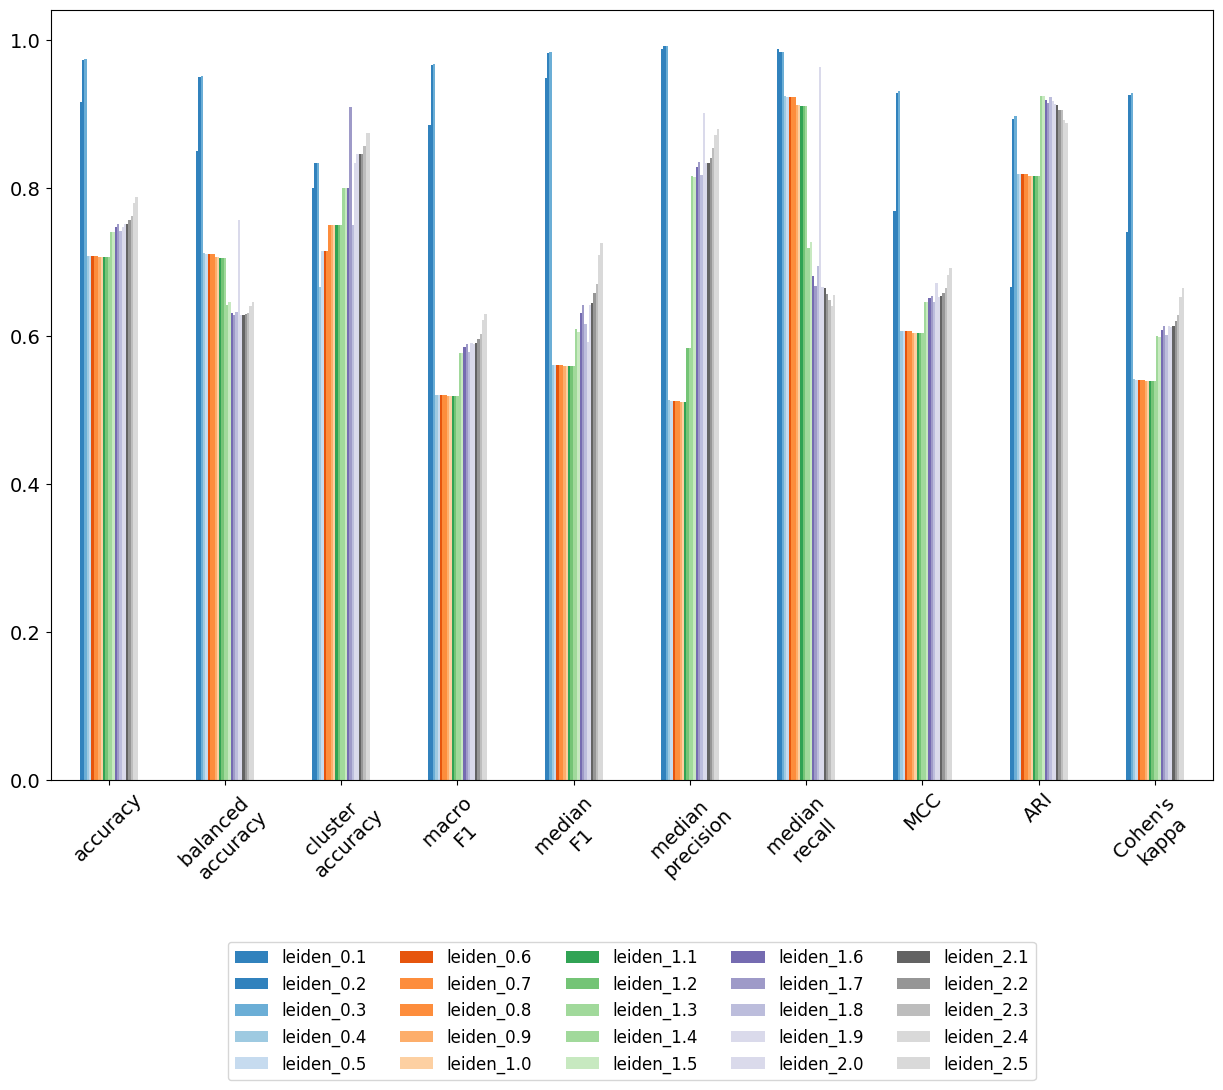

In [45]:
import matplotlib.pyplot as plt
scores_df = scores_df.iloc[:,:-1]
scores_df.columns = ['accuracy', 'balanced \naccuracy','cluster \naccuracy', 'macro \nF1', 'median \nF1',
                      'median \nprecision', 'median \nrecall','MCC', 'ARI', "Cohen's \nkappa"]

ax = scores_df.T.plot(kind='bar', figsize=(15, 10), legend=True, fontsize=12,colormap='tab20c')
#ax.set_xlabel("evaluation metrics", fontsize=12)
ax.set_ylim(ymin=0.0)
ax.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, fontsize=12)
#plt.title("evaluation scores for common cells and common annotations without EpiAnno", fontsize=15)
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.show()
plt.savefig(figures_dir + "Corces2020_brain_scATAC_performance_acros_clustering_res.png", bbox_inches='tight', transparent=True)
